In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# 1.) Clean the Apple Data to get a quarterly series of EPS.

In [44]:
y = pd.read_csv("/Users/OscarIroh_1/Downloads/ML Week 3/AAPL_quarterly_financials.csv")

In [45]:
y.index = y.name

In [46]:
y = pd.DataFrame(y.loc["BasicEPS", :]).iloc[2:,:]

In [47]:
y.index = pd.to_datetime(y.index)

In [48]:
# CHECK IF NAS ARE NO DIVIDEND PERIOD
y = y.sort_index().fillna(0.)

# 2.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data

In [49]:
from pytrends.request import TrendReq

In [50]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords =["Apple Sales", "Tech Support", "Apple iPhone", "Apple Care", "iOS Software Update", "iPad",
           "Taylor Swift Tickets", "Is the Earth Flat", "Hospital"]
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [51]:
X = df.resample("Q").mean()

In [52]:
# fix data
temp = pd.concat([y, X], axis = 1).dropna()
y = temp["BasicEPS"].copy()
X = temp.iloc[:,1:].copy()

# 3.) Normalize all the X data

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()

In [55]:
X_scaled = scaler.fit_transform(X)

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [56]:
from sklearn.linear_model import Lasso

In [65]:
lasso = Lasso(alpha = 0.5)

In [66]:
lasso.fit(X_scaled, y)

Lasso(alpha=0.5)

In [67]:
coefficients = lasso.coef_

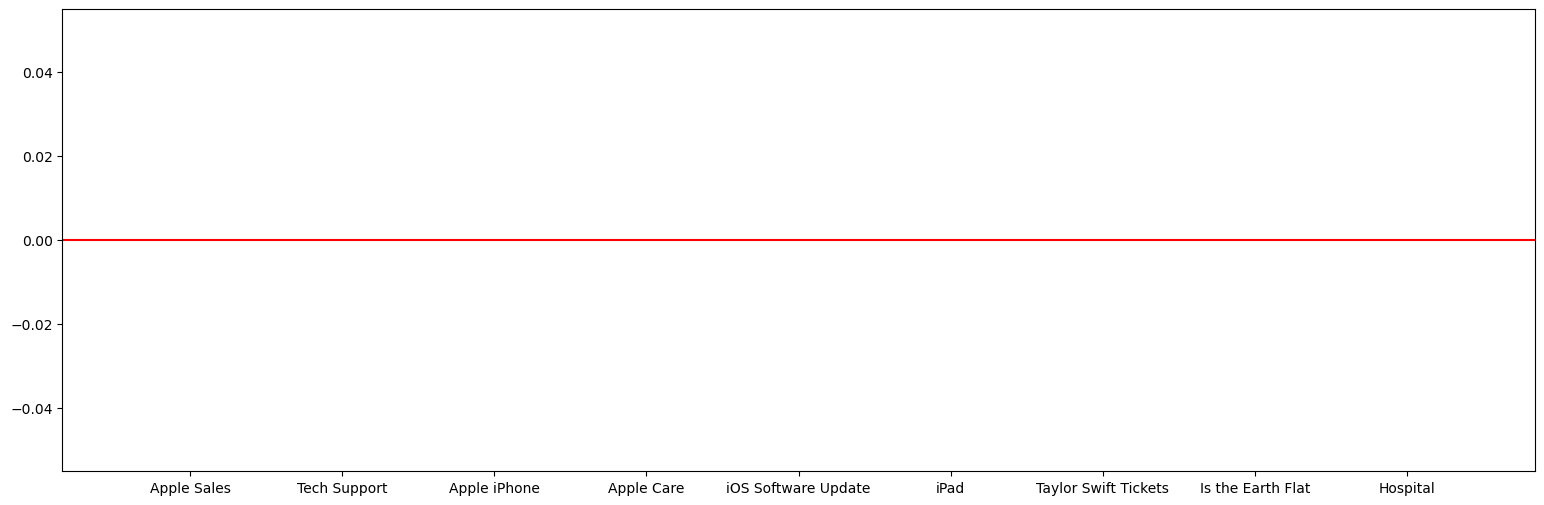

In [68]:
plt.figure(figsize = (19,6))
plt.bar(range(len(coefficients)), coefficients, tick_label = X.columns)
plt.axhline(0., color = "red")
plt.show()

# 5.) Do these coefficient magnitudes make sense?

The magnitudes of the coefficients indicate the strength of the relationship between each feature and the target variable. Positive coefficients suggest a positive association, while negative coefficients imply a negative relationship. The distance of the coefficients from zero indicates the degree of this relationship. In the specific context of the features I selected, it was initially surprising to observe that none of the features showed any association at a Lasso regularization strength of 0.5. However, upon adjusting the regularization strength to 0.1 or 0.05, both positive and negative relationships start to emerge.

In [73]:
lasso = Lasso(alpha = 0.1)

In [74]:
lasso.fit(X_scaled, y)

Lasso(alpha=0.1)

In [75]:
coefficients = lasso.coef_

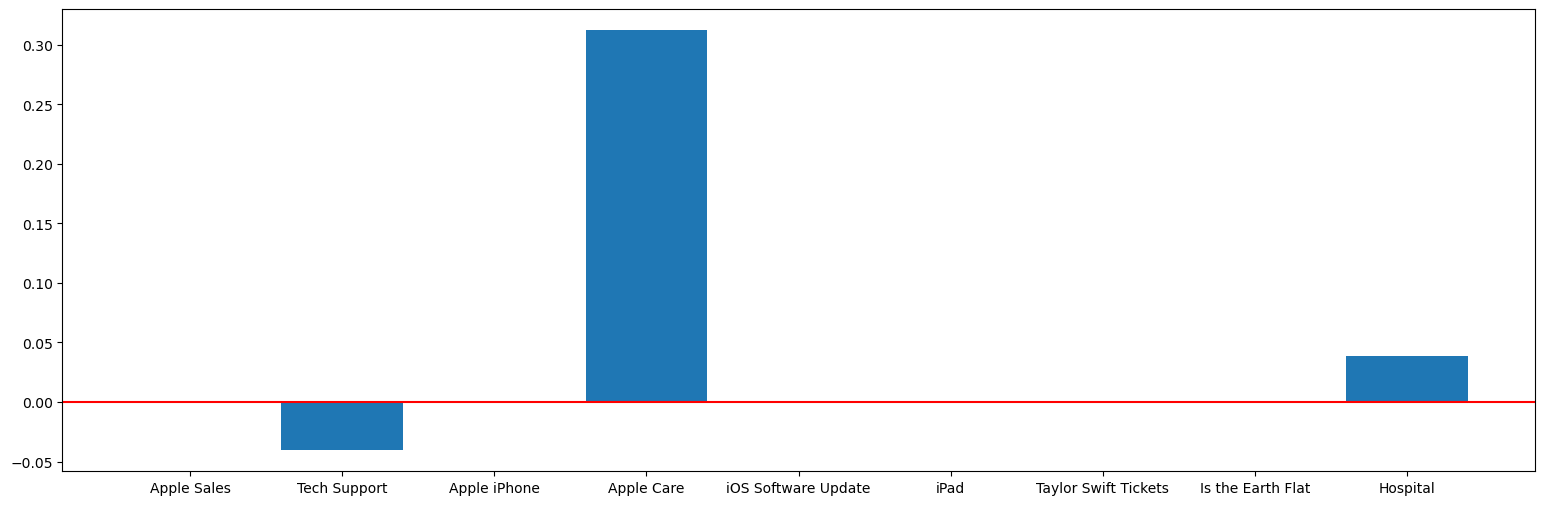

In [76]:
plt.figure(figsize = (19,6))
plt.bar(range(len(coefficients)), coefficients, tick_label = X.columns)
plt.axhline(0., color = "red")
plt.show()